# Cardio Catch Diseases

<h2>Entendendo o Negócio</h2>

<h3>Problema de Negócio</h3> 

<p>
    &emsp; A empresa Cardio Catch Diseases é especializada na detecção precoce de doenças cardíacas. Seu modelo de negócio é centrado em serviços, oferecendo diagnósticos precoces de doenças cardiovasculares por um preço determinado.
</p>
<p>
    &emsp; Atualmente, o diagnóstico de doenças cardiovasculares é realizado manualmente por uma equipe de especialistas. A precisão atual do diagnóstico varia entre 55% e 65%, devido à complexidade do processo e à fadiga da equipe, que trabalha em turnos para minimizar riscos. O custo de cada diagnóstico, incluindo equipamentos e pagamento dos analistas, é aproximadamente R\$1.000,00.
</p>
<p>
    &emsp; O preço do diagnóstico para o cliente varia de acordo com a precisão alcançada pela equipe de especialistas. O cliente paga R$500,00 a cada 5% de acurácia acima de 50%. Por exemplo, para uma precisão de 55%, o diagnóstico custa R\$500,00; para uma precisão de 60%, o valor é R\$1.000,00, e assim por diante. Se a precisão do diagnóstico for 50%, o cliente não paga por ele.
</p>
<p>
    &emsp; É importante notar que a variação na precisão, determinada pela equipe de especialistas, leva a empresa a operar ora com lucro (receita maior que o custo) e ora com prejuízo (receita menor que o custo). Essa instabilidade no diagnóstico resulta em um fluxo de caixa imprevisível para a empresa.
</p>
<p>
    &emsp; O objetivo do cientista de dados contratado pela Cardio Catch Diseases é desenvolver uma ferramenta que aumente a precisão do diagnóstico e garanta estabilidade em todos os diagnósticos.
<p/>

<h3>Existem 3 tipos de características de entrada:</h3>
<p>
    &emsp; &#8226; Objetiva - informações factuais<br>
    &emsp; &#8226; Exame - resultados de exames médicos<br>
    &emsp; &#8226; Subjetiva - informações fornecidas pelo paciente
</p>

<table>
    <thead>
        <tr>
            <th>SIGNIFICADO</th>
            <th>CARACTERÍSTICA</th>
            <th>NOME</th>
            <th>TIPO</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Idade</td>
            <td>Objetiva</td>
            <td>age</td>
            <td>int (days), 1:women, 2:men</td>
        </tr>
        <tr>
            <td>Altura</td>
            <td>Objetiva</td>
            <td>height</td>
            <td>int (cm)</td>
        </tr>
        <tr>
            <td>Peso</td>
            <td>Objetiva</td>
            <td>weight</td>
            <td>float (kg)</td>
        </tr>
        <tr>
            <td>Gênero</td>
            <td>Objetiva</td>
            <td>gender</td>
            <td>categorical</td>
        </tr>
        <tr>
            <td>Pressão arterial sistólica</td>
            <td>Exame</td>
            <td>ap_hi</td>
            <td>int</td>
        </tr>
        <tr>
            <td>Pressão arterial diastólica</td>
            <td>Exame</td>
            <td>ap_lo</td>
            <td>int</td>
        </tr>
        <tr>
            <td>Colesterol</td>
            <td>Exame</td>
            <td>cholesterol</td>
            <td>1: normal, 2: acima do normal, 3: muito acima do normal</td>
        </tr>
        <tr>
            <td>Glicose</td>
            <td>Exame</td>
            <td>gluc</td>
            <td>1: normal, 2: acima do normal, 3: muito acima do normal</td>
        </tr>
        <tr>
            <td>Tabagismo</td>
            <td>Subjetiva</td>
            <td>smoke</td>
            <td>binary</td>
        </tr>
        <tr>
            <td>Consumo de álcool</td>
            <td>Subjetiva</td>
            <td>alco</td>
            <td>binary</td>
        </tr>
        <tr>
            <td>Atividade física</td>
            <td>Subjetiva</td>
            <td>active</td>
            <td>binary</td>
        </tr>
        <tr>
            <td>Presença ou ausência de doença cardiovascular</td>
            <td>Variável Alvo</td>
            <td>cardio</td>
            <td>binary</td>
        </tr>
    </tbody>
</table>

<p>
Todos os valores do conjunto de dados foram coletados no momento do exame médico.
</p>

<h1>1 - Imports</h1>

<h2>&#8226; Pacotes</h2>

In [44]:
from funcoes import jupyter_settings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [45]:
jupyter_settings()

<h2>&#8226; Dados</h2>

In [46]:
df_raw = pd.read_csv("datasets/cardio_dataset.csv", sep=";")

<h1>2 - Análise Descritiva dos Dados</h1>

In [47]:
df1 = df_raw.copy()

<h2>&#8226; Dimensão dos Dados</h2>

In [48]:
print( f"Quantidade de linhas: {df1.shape[0]}" )
print( f"Quantidade de colunas: {df1.shape[1]}" )

Quantidade de linhas: 70000
Quantidade de colunas: 13


<h2>&#8226; Tipos de variáveis</h2>

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<h2>&#8226; Linhas Duplicadas</h2>

In [50]:
df1.duplicated().sum()

0

<h2>&#8226; Dados Faltantes</h2>

In [51]:
df1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<p>O dataset não possuí valores faltantes</p>

<h2>&#8226; Estatísticas Descritivas</h2>

In [52]:
# Medida de Tendência central
aux1 = df1[["age", "height", "weight", "ap_hi", "ap_lo"]]

ct1 = pd.DataFrame( aux1.apply( np.mean ) ).T
ct2 = pd.DataFrame( aux1.apply( np.median ) ).T

# Medida de dispersão
d1 = pd.DataFrame( aux1.apply( np.std )).T
d2 = pd.DataFrame( aux1.apply( min ) ).T
d3 = pd.DataFrame( aux1.apply( max ) ).T
d4 = pd.DataFrame( aux1.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( aux1.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( aux1.apply( lambda x: x.kurtosis() ) ).T

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,10798.0,23713.0,12915.0,19468.865814,19703.0,2467.234044,-0.307055,-0.823447
1,height,55.0,250.0,195.0,164.359229,165.0,8.210068,-0.642187,7.943653
2,weight,10.0,200.0,190.0,74.205690,72.0,14.395654,1.012070,2.586825
3,ap_hi,-150.0,16020.0,16170.0,128.817286,120.0,154.010319,85.296214,7580.074738
4,ap_lo,-70.0,11000.0,11070.0,96.630414,80.0,188.471184,32.114083,1425.914585


<Figure size 2000x2000 with 0 Axes>

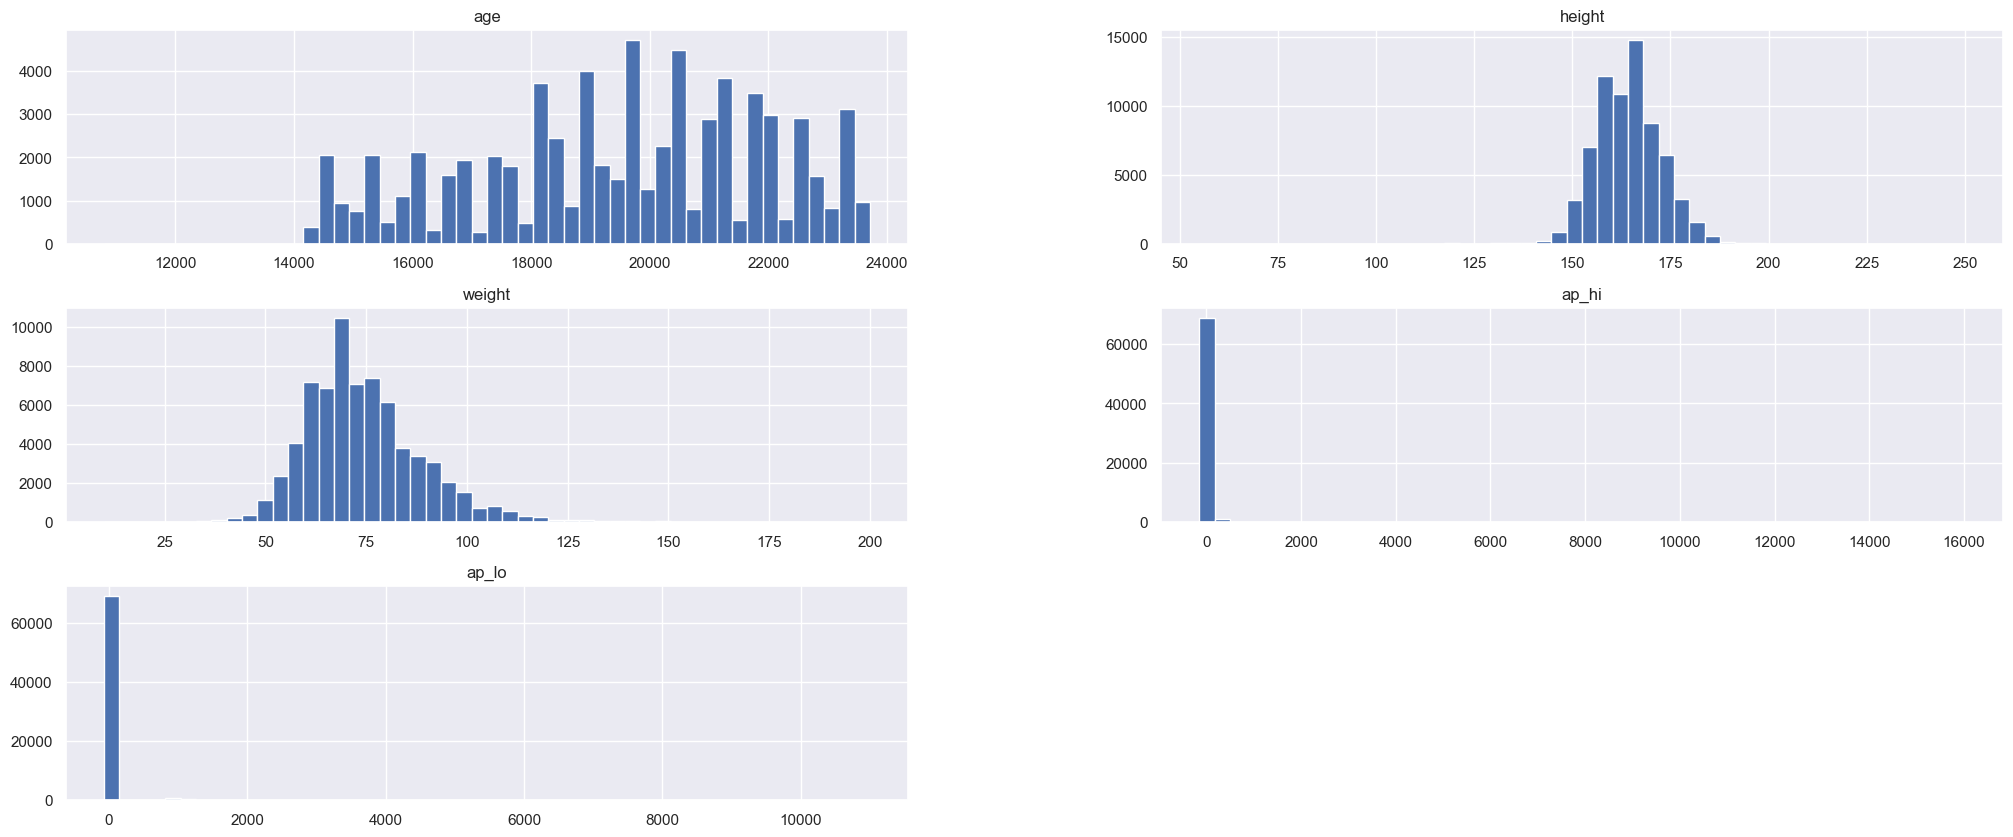

In [53]:
plt.figure(figsize=(20,20))
aux1.hist(bins=50);

In [54]:
print(f"Gênero: {df1['gender'].unique()}")
print(f"Colesterol: {df1['cholesterol'].unique()}")
print(f"Glicose: {df1['gluc'].unique()}")
print(f"Tabagismo: {df1['smoke'].unique()}")
print(f"Alcool: {df1['alco'].unique()}")
print(f"Atividade física{df1['active'].unique()}")
print(f"Cardio: {df1['cardio'].unique()}")

Gênero: [2 1]
Colesterol: [1 3 2]
Glicose: [1 2 3]
Tabagismo: [0 1]
Alcool: [0 1]
Atividade física[1 0]
Cardio: [0 1]


<h1>3 - Feature Engineering</h1>

In [55]:
df2 = df1.copy()

In [56]:
df2["age_anos"] = np.round(df2["age"]/365)
df2["IMC"] = np.round(df2["weight"]/(df2["height"]/100)**2, 2)

In [57]:
df2["gender"].unique()

array([2, 1], dtype=int64)

<h2>Mapa de Hipóteses</h2?

<p>
    &emsp; <strong>&#8226; 1.</strong> Pessoas mais velhas possui maior chance de ter doença cardiovascular<br>
    &emsp; <strong>&#8226; 2.</strong> Pessoas com peso mais alto possui maior chance de ter doença cardiovascular<br>
    &emsp; <strong>&#8226; 3.</strong> Pessoas com pressão alta possui maior chance de ter doença cardiovascular<br>
    &emsp; <strong>&#8226; 4.</strong> Pessoas com colesterol alto possui maior chance de ter doença cardiovascular<br>
    &emsp; <strong>&#8226; 5.</strong> Pessoas com glicose alta possui maior chance de ter doença cardiovascular<br>
    &emsp; <strong>&#8226; 6.</strong> Fumantes possuem maior chance de ter doença cardiovascular<br>
    &emsp; <strong>&#8226; 7.</strong> Alcoólicos possuem maior chance de ter doença cardiovascular<br>
    &emsp; <strong>&#8226; 8.</strong> Praticantes de atividade física possuem menor chance de ter doença cardiovascular<br>
    &emsp; <strong>&#8226; 8.</strong> Homens possuem maior insidencia de doença cardiovascular
</p>

<h1>4 - Análise Exploratória de Dados</h1>

In [58]:
df3 = df2.copy()

<h2>&#8226; Análise Univariada</h2>

<h3>Pressão Arterial</h3>

<p>
    A pressão arterial sistólica precisa, obrigatóriamente, maior que a diastólica.
</p>

In [59]:
df3 = df3[df3["ap_hi"] > df3["ap_lo"]]

In [60]:
print(f"- Menor Pressão Arterial Sistólica na base de dados: {df3['ap_hi'].min()}")
print(f"- Maior Pressão Arterial Sistólica na base de dados: {df3['ap_hi'].max()}")
print("")
print(f"- Menor Pressão Arterial Diastólica na base de dados: {df3['ap_lo'].min()}")
print(f"- Maior Pressão Arterial Diastólica na base de dados: {df3['ap_lo'].max()}")

- Menor Pressão Arterial Sistólica na base de dados: 12
- Maior Pressão Arterial Sistólica na base de dados: 16020

- Menor Pressão Arterial Diastólica na base de dados: -70
- Maior Pressão Arterial Diastólica na base de dados: 182


<p>
    Na pressão sistólica temos valores muito altos e muito baixose na diastólica valor negativo muito baixo. Vamos olhar isso com mais calma.
</p>

<h4>Pressão Arterial Sistólica</h4>

In [61]:
df3 = df3[df3["ap_hi"] < 300]

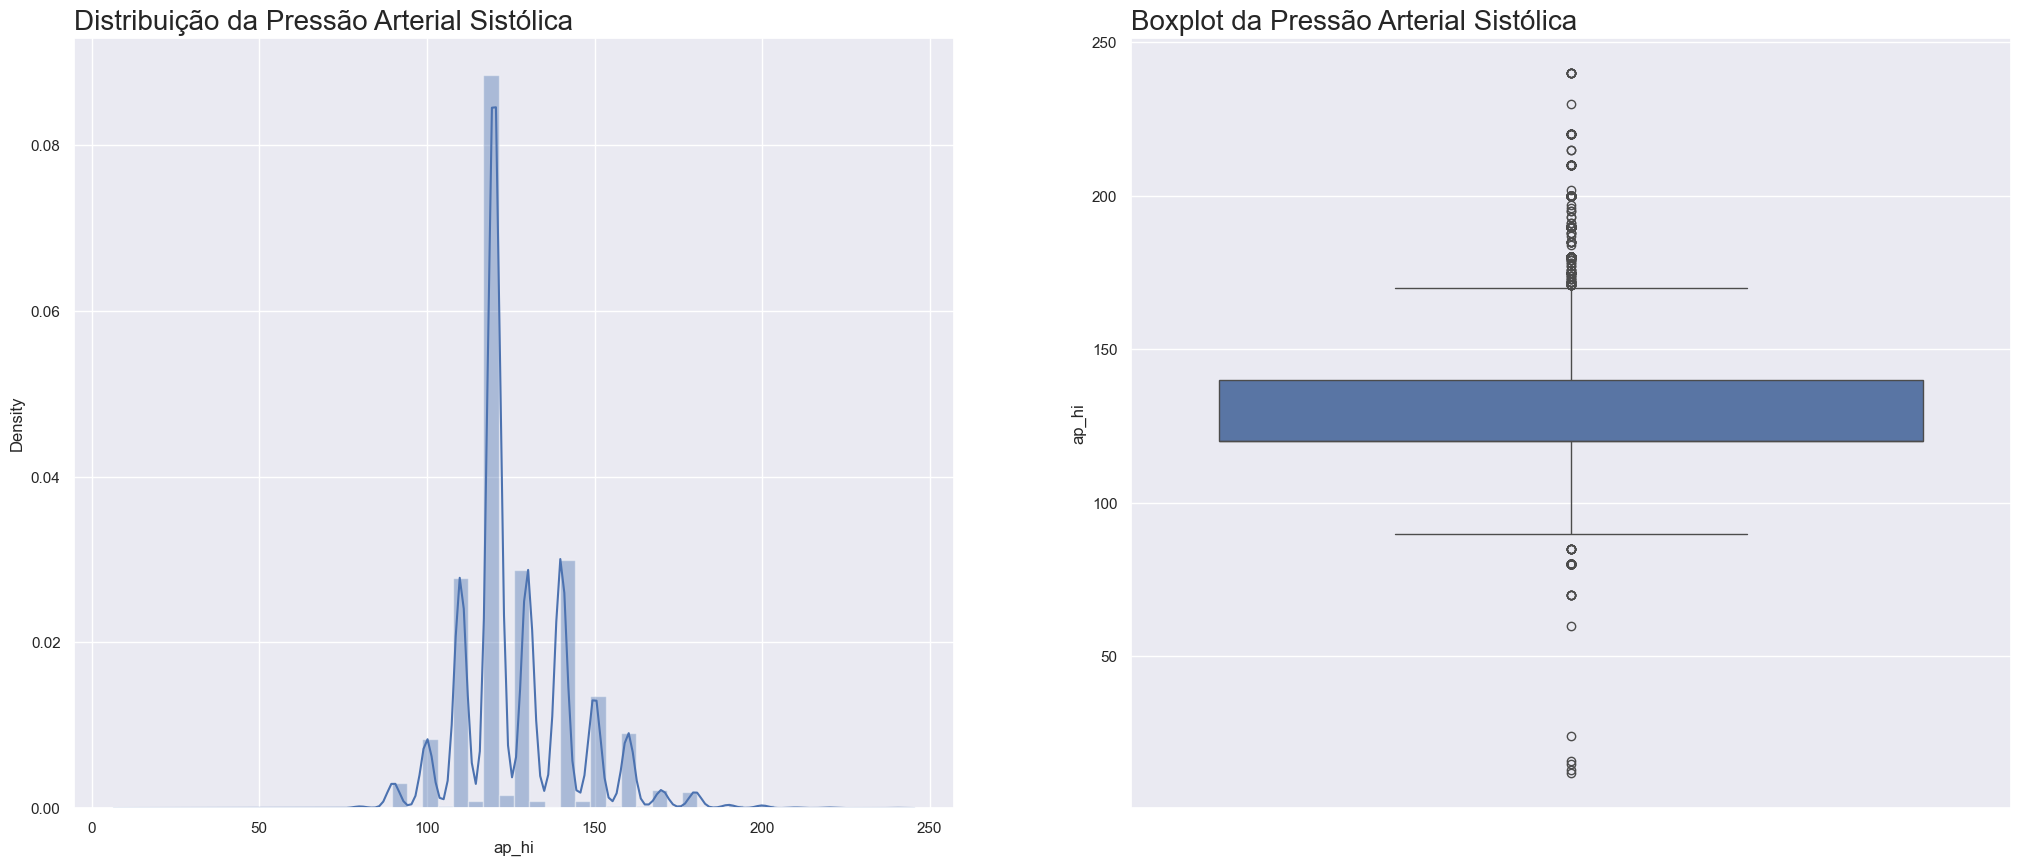

In [62]:
plt.subplot(1, 2, 1)
sns.distplot(df3["ap_hi"]);
plt.title("Distribuição da Pressão Arterial Sistólica", fontsize=20, loc="left");

plt.subplot(1, 2, 2)
sns.boxplot(df3["ap_hi"]);
plt.title("Boxplot da Pressão Arterial Sistólica", fontsize=20, loc="left");

<h4>Pressão Arterial Diastólica</h4>

In [63]:
#Temos apenas um valor negativo 
df3 = df3[df3["ap_lo"] > 0] 

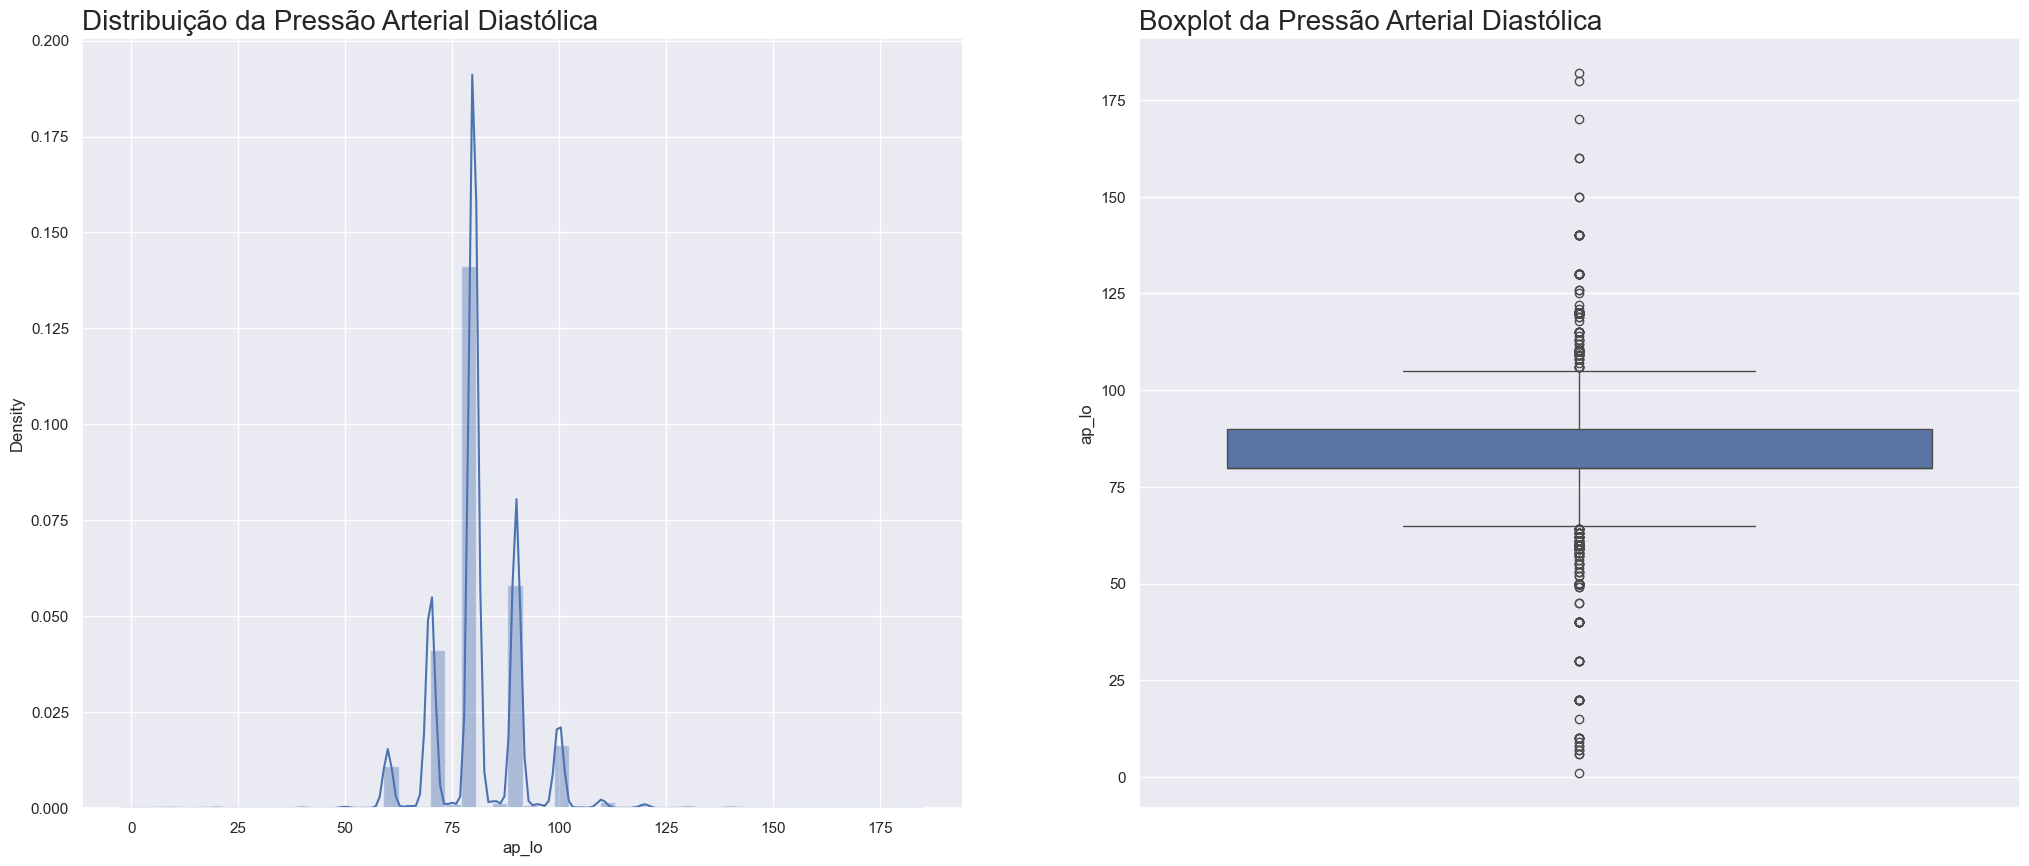

In [64]:
plt.subplot(1, 2, 1)
sns.distplot(df3["ap_lo"]);
plt.title("Distribuição da Pressão Arterial Diastólica", fontsize=20, loc="left");

plt.subplot(1, 2, 2)
sns.boxplot(df3["ap_lo"]);
plt.title("Boxplot da Pressão Arterial Diastólica", fontsize=20, loc="left");

In [65]:
print(f"- Menor Pressão Arterial Sistólica na base de dados: {df3['ap_hi'].min()}")
print(f"- Maior Pressão Arterial Sistólica na base de dados: {df3['ap_hi'].max()}")
print("")
print(f"- Menor Pressão Arterial Diastólica na base de dados: {df3['ap_lo'].min()}")
print(f"- Maior Pressão Arterial Diastólica na base de dados: {df3['ap_lo'].max()}")

- Menor Pressão Arterial Sistólica na base de dados: 16
- Maior Pressão Arterial Sistólica na base de dados: 240

- Menor Pressão Arterial Diastólica na base de dados: 1
- Maior Pressão Arterial Diastólica na base de dados: 182


<p>
    Ainda existem valores que não condizem com a realidade. Vamos avaliar isto mais para frente
</p>

<h3>Age</h3>

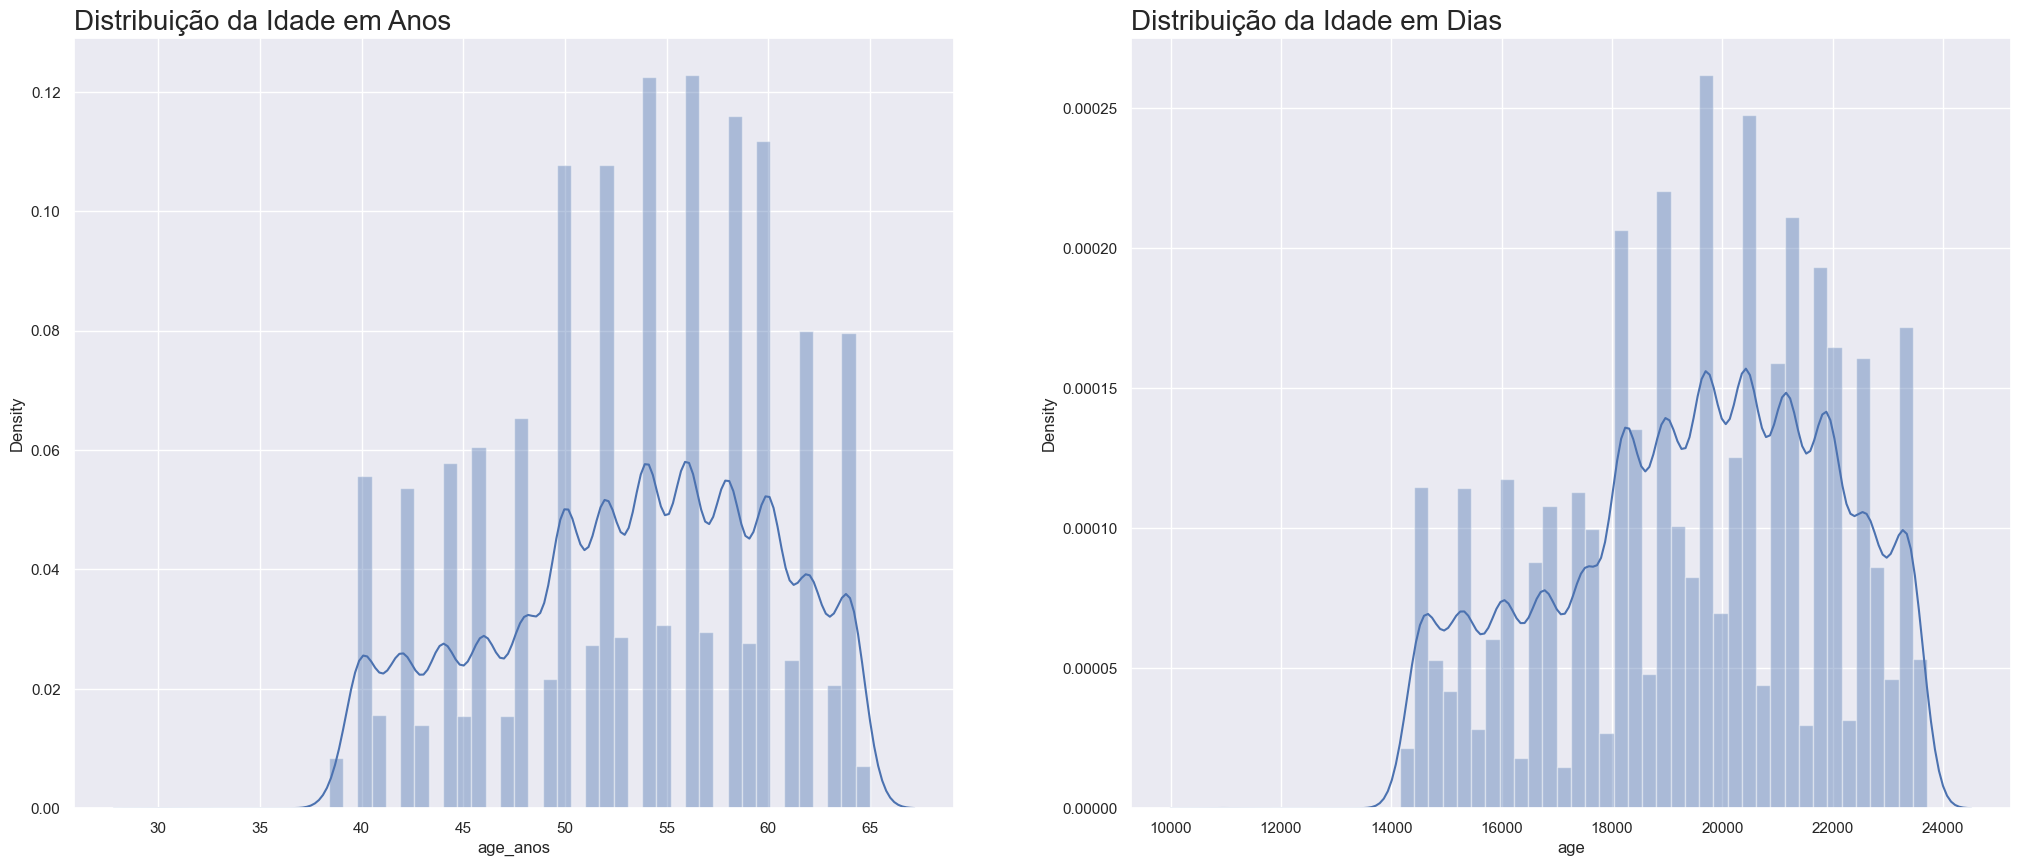

In [66]:
plt.subplot(1,2,1)
sns.distplot(df3["age_anos"]);
plt.title("Distribuição da Idade em Anos", fontsize=20, loc="left");
plt.subplot(1,2,2)
sns.distplot(df3["age"]);
plt.title("Distribuição da Idade em Dias", fontsize=20, loc="left");

In [67]:
print(f"- Menor idade na base de dados: {df3['age_anos'].min()}")
print(f"- Maior idade na base de dados: {df3['age_anos'].max()}")

- Menor idade na base de dados: 30.0
- Maior idade na base de dados: 65.0


<p>
    &#8226; A distribuição da idade parece estar de acordo com a realidade.
</p>

<h3>Gender</h3>

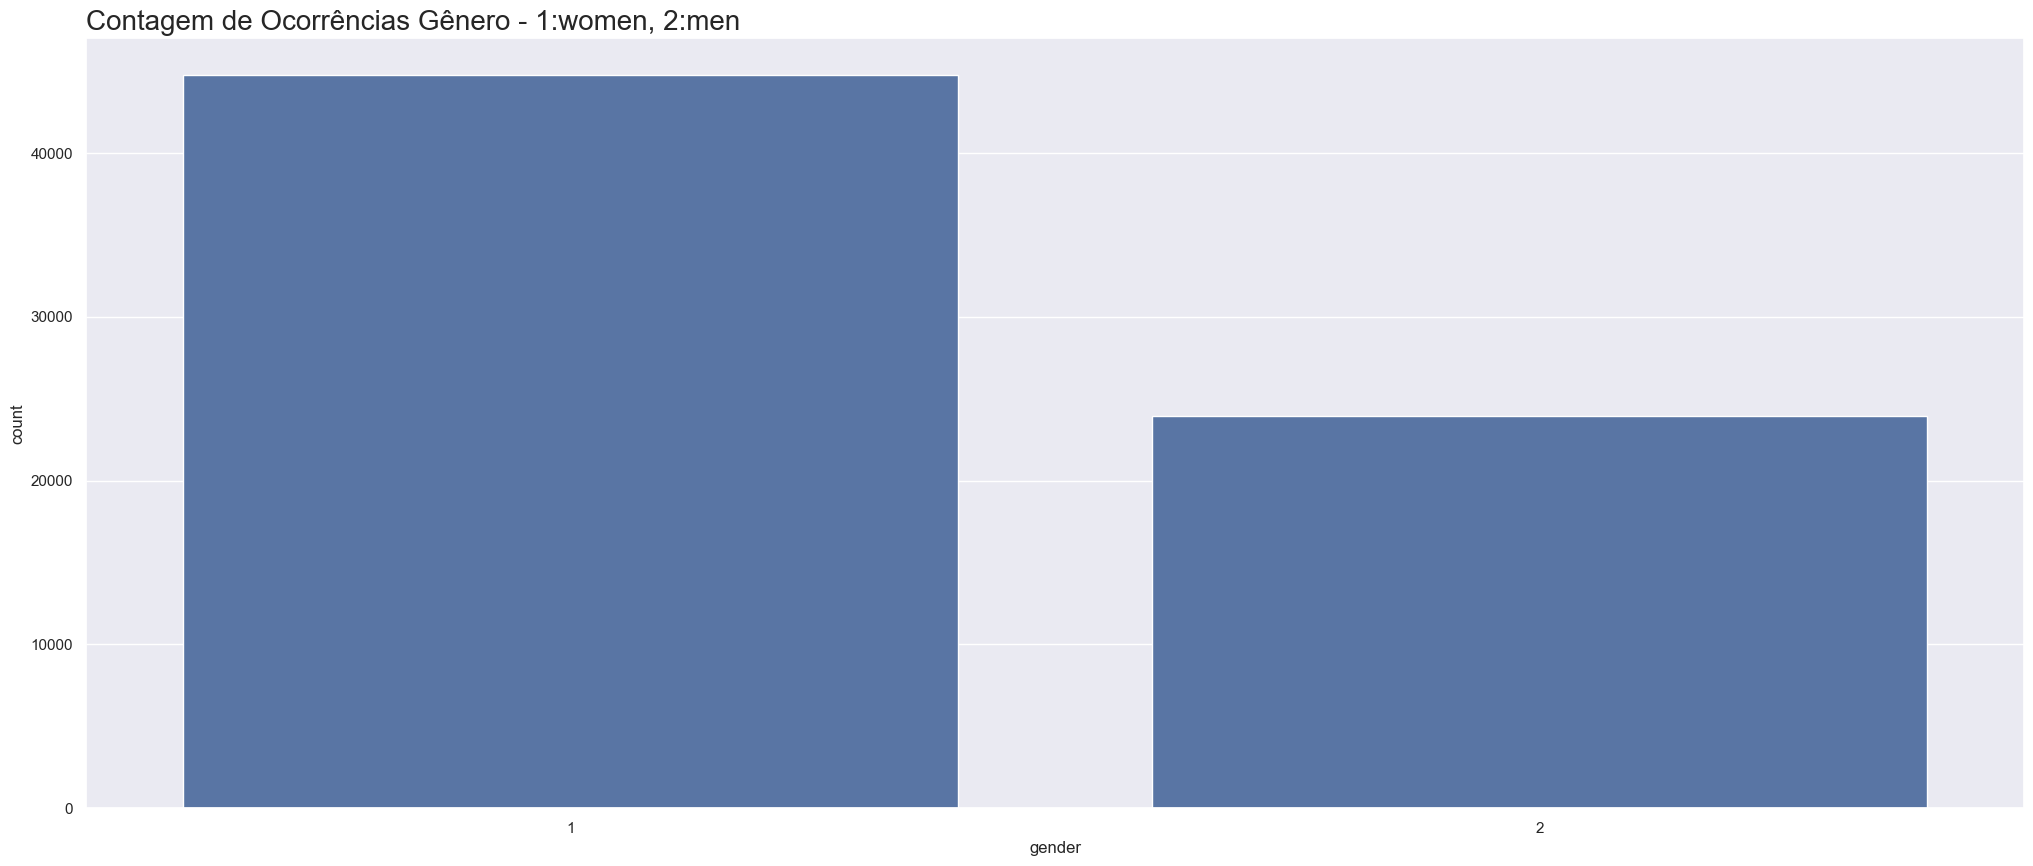

In [68]:
sns.countplot(x="gender", data=df3)
plt.title("Contagem de Ocorrências Gênero - 1:women, 2:men", fontsize=20, loc="left")
plt.show()

<p>
    &#8226; Maior parte da base de dados corresponde a Mulheres.
</p>

<h3>Height</h3>

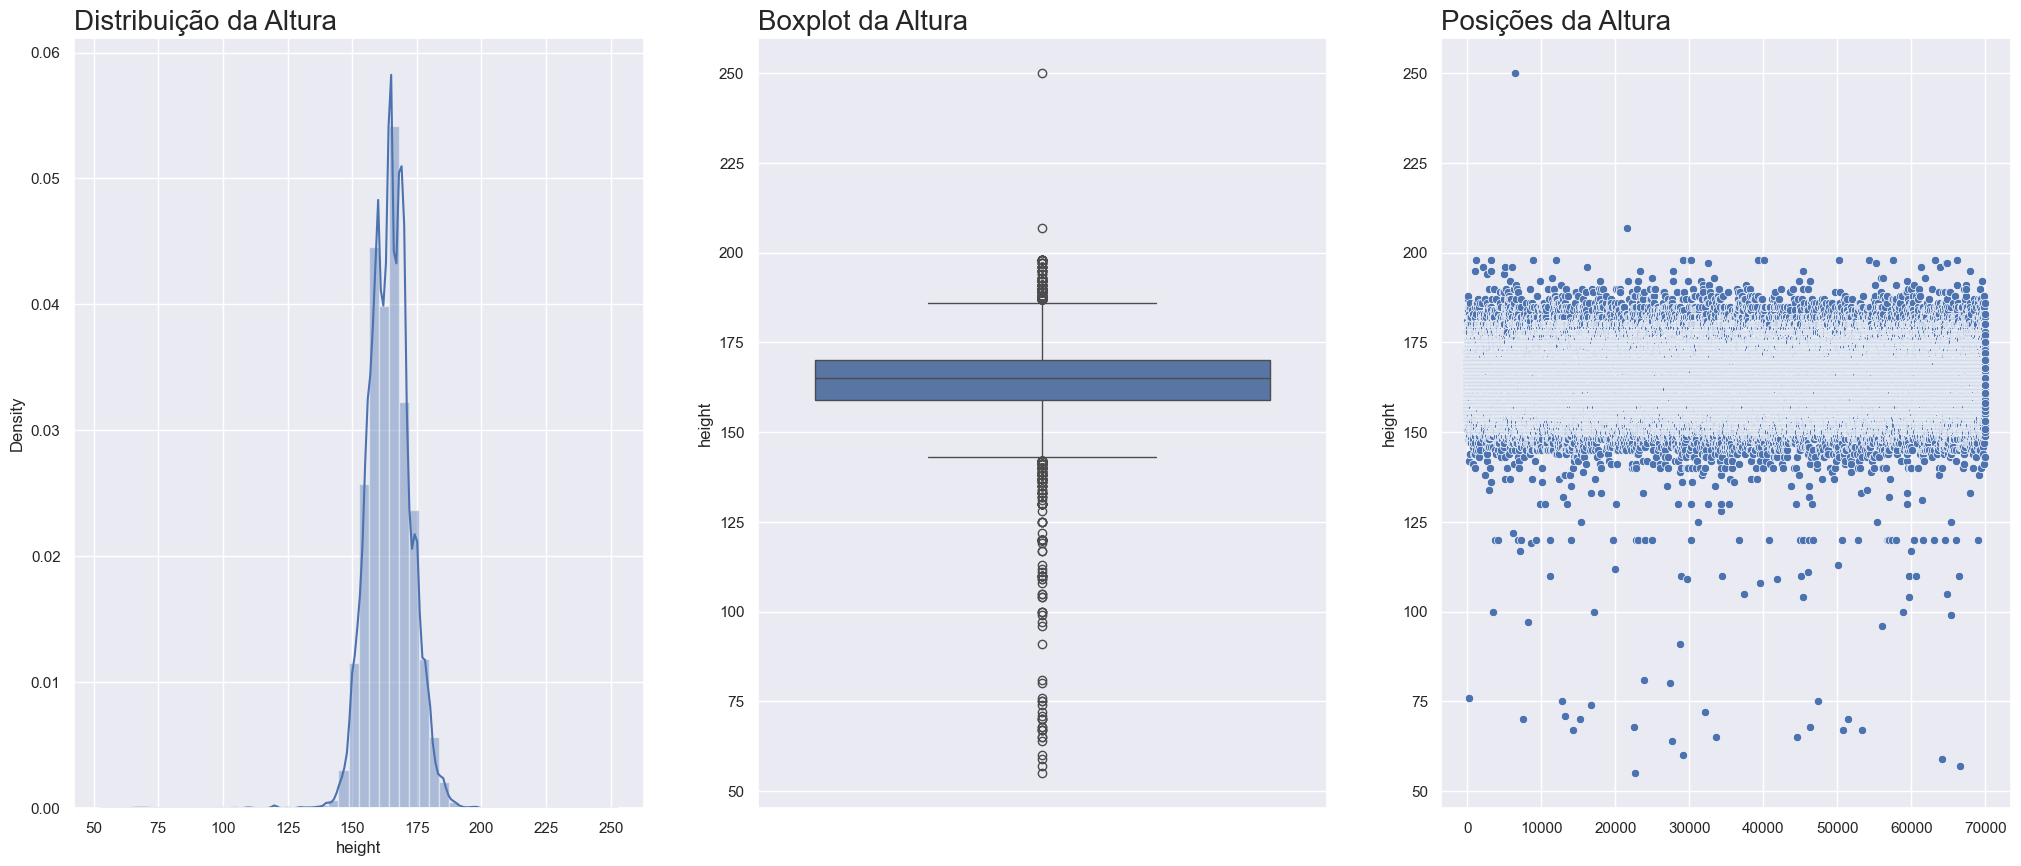

In [69]:
plt.subplot(1, 3, 1)
sns.distplot(df3["height"]);
plt.title("Distribuição da Altura", fontsize=20, loc="left");

plt.subplot(1, 3, 2)
sns.boxplot(df3["height"]);
plt.title("Boxplot da Altura", fontsize=20, loc="left");


plt.subplot(1, 3, 3)
sns.scatterplot(df3["height"]);
plt.title("Posições da Altura", fontsize=20, loc="left");

In [70]:
print(f"- Menor altura na base de dados: {df3['height'].min()}")
print(f"- Maior altura na base de dados: {df3['height'].max()}")

- Menor altura na base de dados: 55
- Maior altura na base de dados: 250


In [71]:
#Avaliando por faixas
#Usando sturges
n = df3.shape[0]
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))

In [72]:
df3["faixa_height"] = pd.cut(x = df3["height"], bins = k, include_lowest = True)
aux = df3["faixa_height"].value_counts().to_frame().reset_index()
aux

,faixa_height,count
0,"(158.235, 169.706]",34862
1,"(169.706, 181.176]",16444
2,"(146.765, 158.235]",15532
3,"(181.176, 192.647]",1172
4,"(135.294, 146.765]",541
5,"(192.647, 204.118]",38
6,"(112.353, 123.824]",38
7,"(123.824, 135.294]",34
8,"(100.882, 112.353]",16
9,"(66.471, 77.941]",14


In [73]:
#Como uma primeira abordagem vamos retirar outliers baseado em IQR (Interquartile Range)
Q1 = df3['height'].quantile(0.25)
Q3 = df3['height'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df3 = df3[(df3['height'] >= limite_inferior) & (df3['height'] <= limite_superior)]

In [74]:
df3["faixa_height"] = pd.cut(x = df3["height"], bins = k, include_lowest = True)
aux = df3["faixa_height"].value_counts().to_frame().reset_index()
aux

,faixa_height,count
0,"(163.235, 165.765]",9095
1,"(165.765, 168.294]",8762
2,"(155.647, 158.176]",7741
3,"(160.706, 163.235]",7357
4,"(168.294, 170.824]",7357
5,"(158.176, 160.706]",6897
6,"(170.824, 173.353]",4315
7,"(173.353, 175.882]",3308
8,"(153.118, 155.647]",3152
9,"(150.588, 153.118]",2766


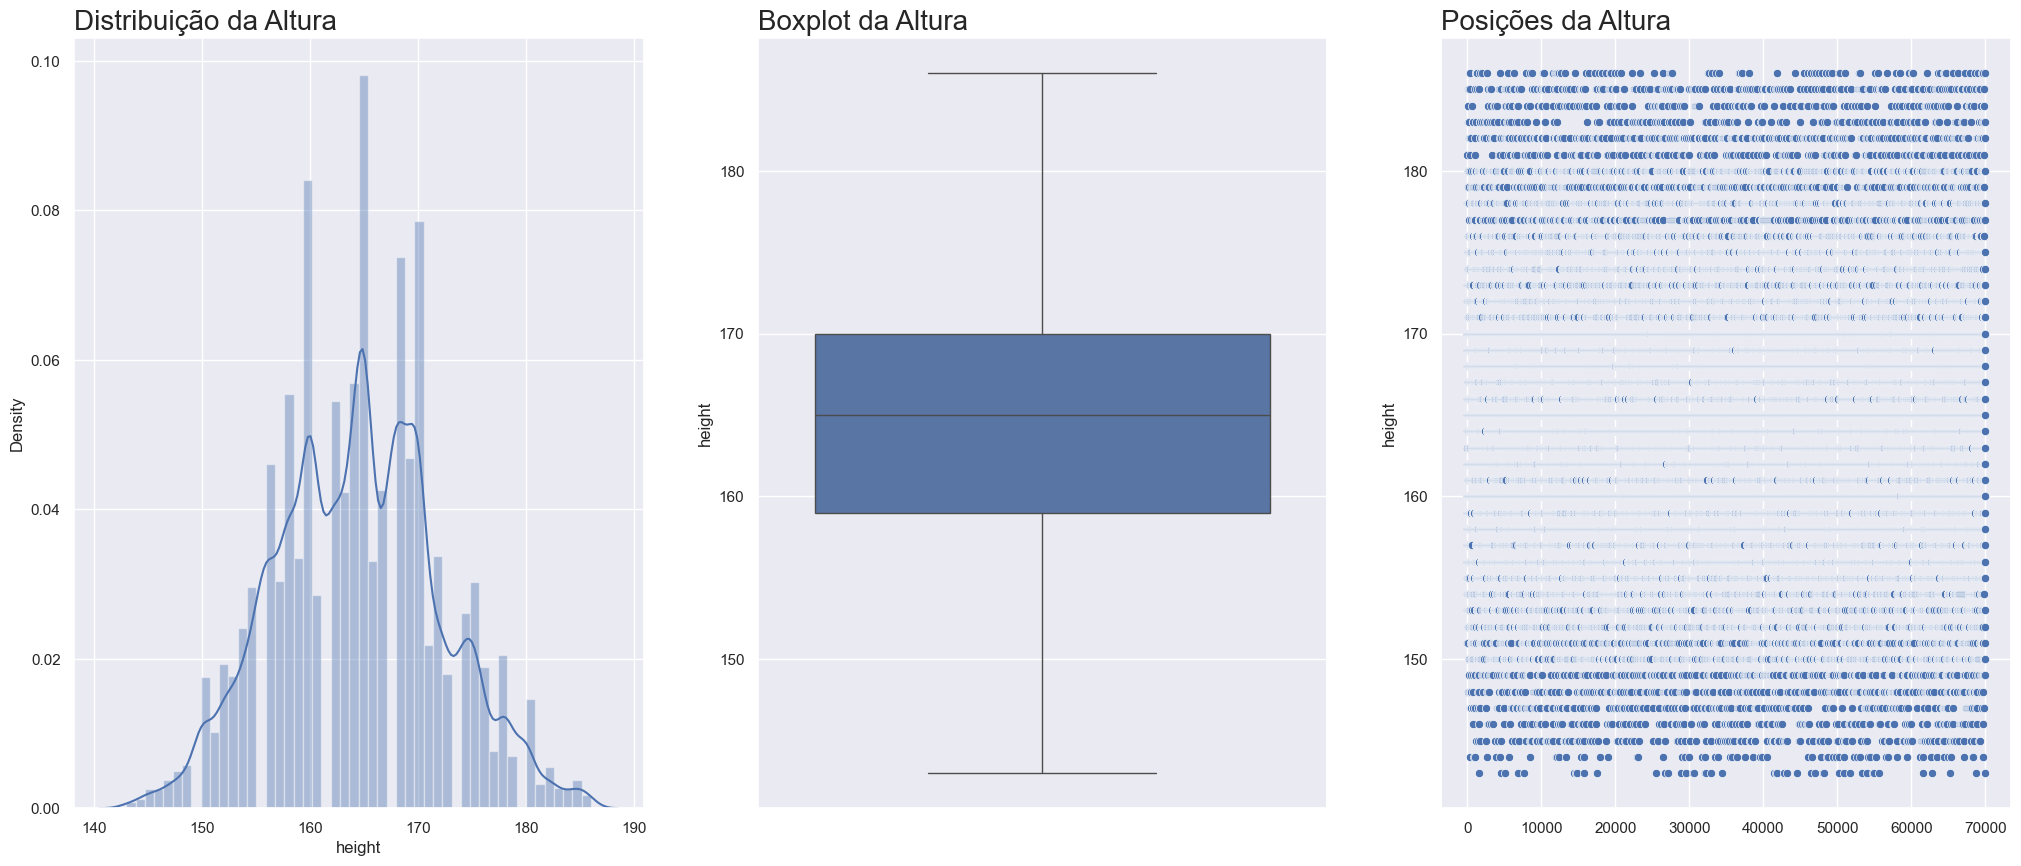

In [75]:
plt.subplot(1, 3, 1)
sns.distplot(df3["height"]);
plt.title("Distribuição da Altura", fontsize=20, loc="left");

plt.subplot(1, 3, 2)
sns.boxplot(df3["height"]);
plt.title("Boxplot da Altura", fontsize=20, loc="left");


plt.subplot(1, 3, 3)
sns.scatterplot(df3["height"]);
plt.title("Posições da Altura", fontsize=20, loc="left");

<h3>weight</h3>

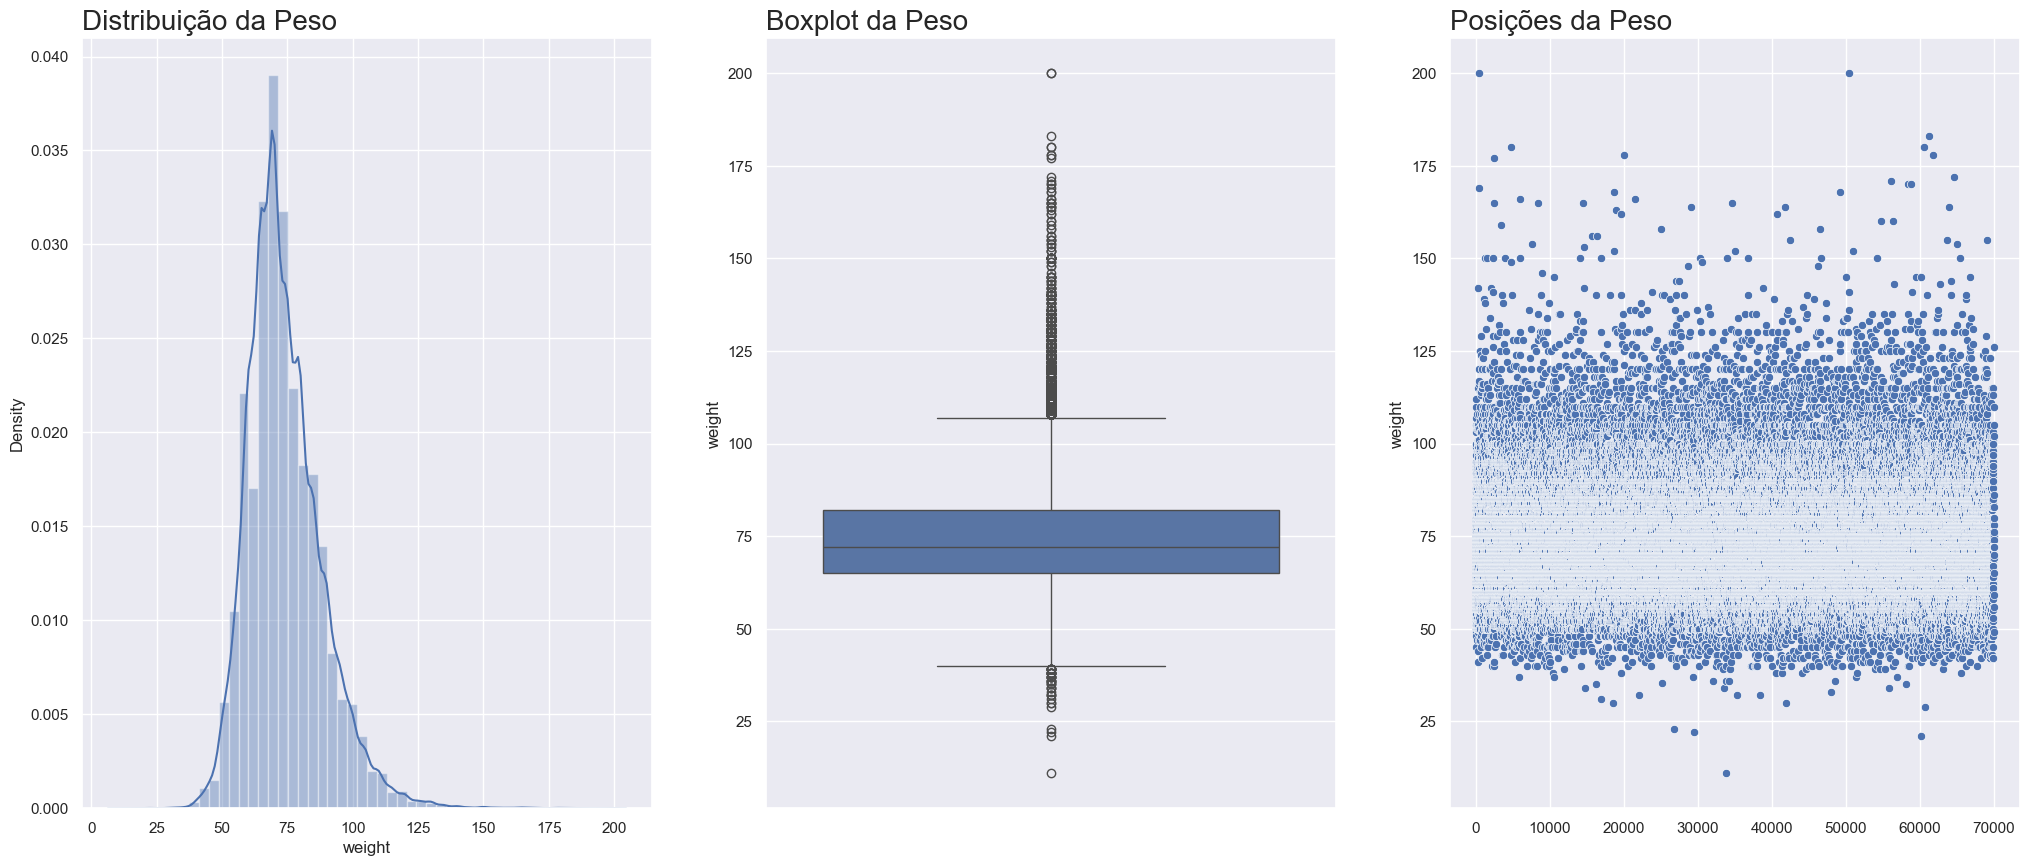

In [76]:
plt.subplot(1, 3, 1)
sns.distplot(df3["weight"]);
plt.title("Distribuição da Peso", fontsize=20, loc="left");

plt.subplot(1, 3, 2)
sns.boxplot(df3["weight"]);
plt.title("Boxplot da Peso", fontsize=20, loc="left");


plt.subplot(1, 3, 3)
sns.scatterplot(df3["weight"]);
plt.title("Posições da Peso", fontsize=20, loc="left");

In [77]:
print(f"- Menor peso na base de dados: {df3['weight'].min()}")
print(f"- Maior peso na base de dados: {df3['weight'].max()}")

- Menor peso na base de dados: 11.0
- Maior peso na base de dados: 200.0


In [78]:
#Avaliando por faixas
#Usando sturges
n = df3.shape[0]
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))

In [79]:
df3["faixa_weight"] = pd.cut(x = df3["weight"], bins = k, include_lowest = True)
aux = df3["faixa_weight"].value_counts().to_frame().reset_index()
aux

,faixa_weight,count
0,"(66.588, 77.706]",22314
1,"(55.471, 66.588]",17771
2,"(77.706, 88.824]",14078
3,"(88.824, 99.941]",6431
4,"(44.353, 55.471]",3708
5,"(99.941, 111.059]",2536
6,"(111.059, 122.176]",691
7,"(33.235, 44.353]",262
8,"(122.176, 133.294]",253
9,"(133.294, 144.412]",81


In [80]:
#Novamente, como uma primeira abordagem vamos retirar outliers baseado em IQR (Interquartile Range)
Q1 = df3['weight'].quantile(0.25)
Q3 = df3['weight'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df3 = df3[(df3['weight'] >= limite_inferior) & (df3['weight'] <= limite_superior)]

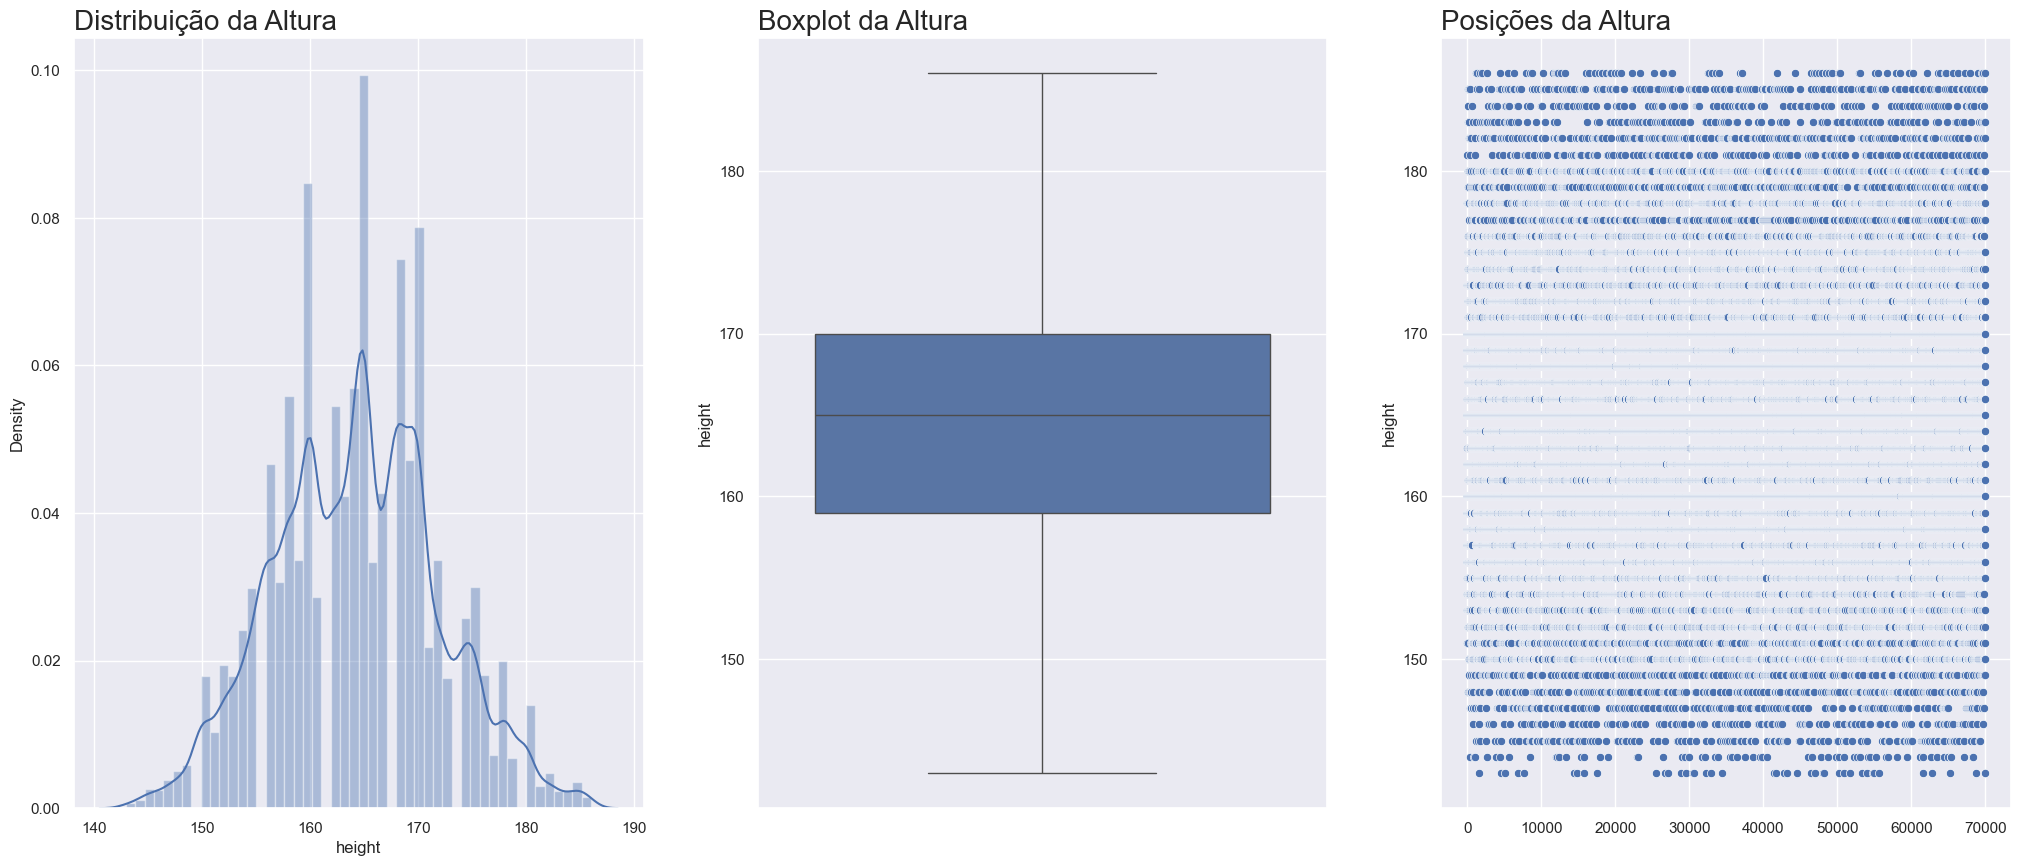

In [81]:
plt.subplot(1, 3, 1)
sns.distplot(df3["height"]);
plt.title("Distribuição da Altura", fontsize=20, loc="left");

plt.subplot(1, 3, 2)
sns.boxplot(df3["height"]);
plt.title("Boxplot da Altura", fontsize=20, loc="left");


plt.subplot(1, 3, 3)
sns.scatterplot(df3["height"]);
plt.title("Posições da Altura", fontsize=20, loc="left");

<h2>IMC</h2>

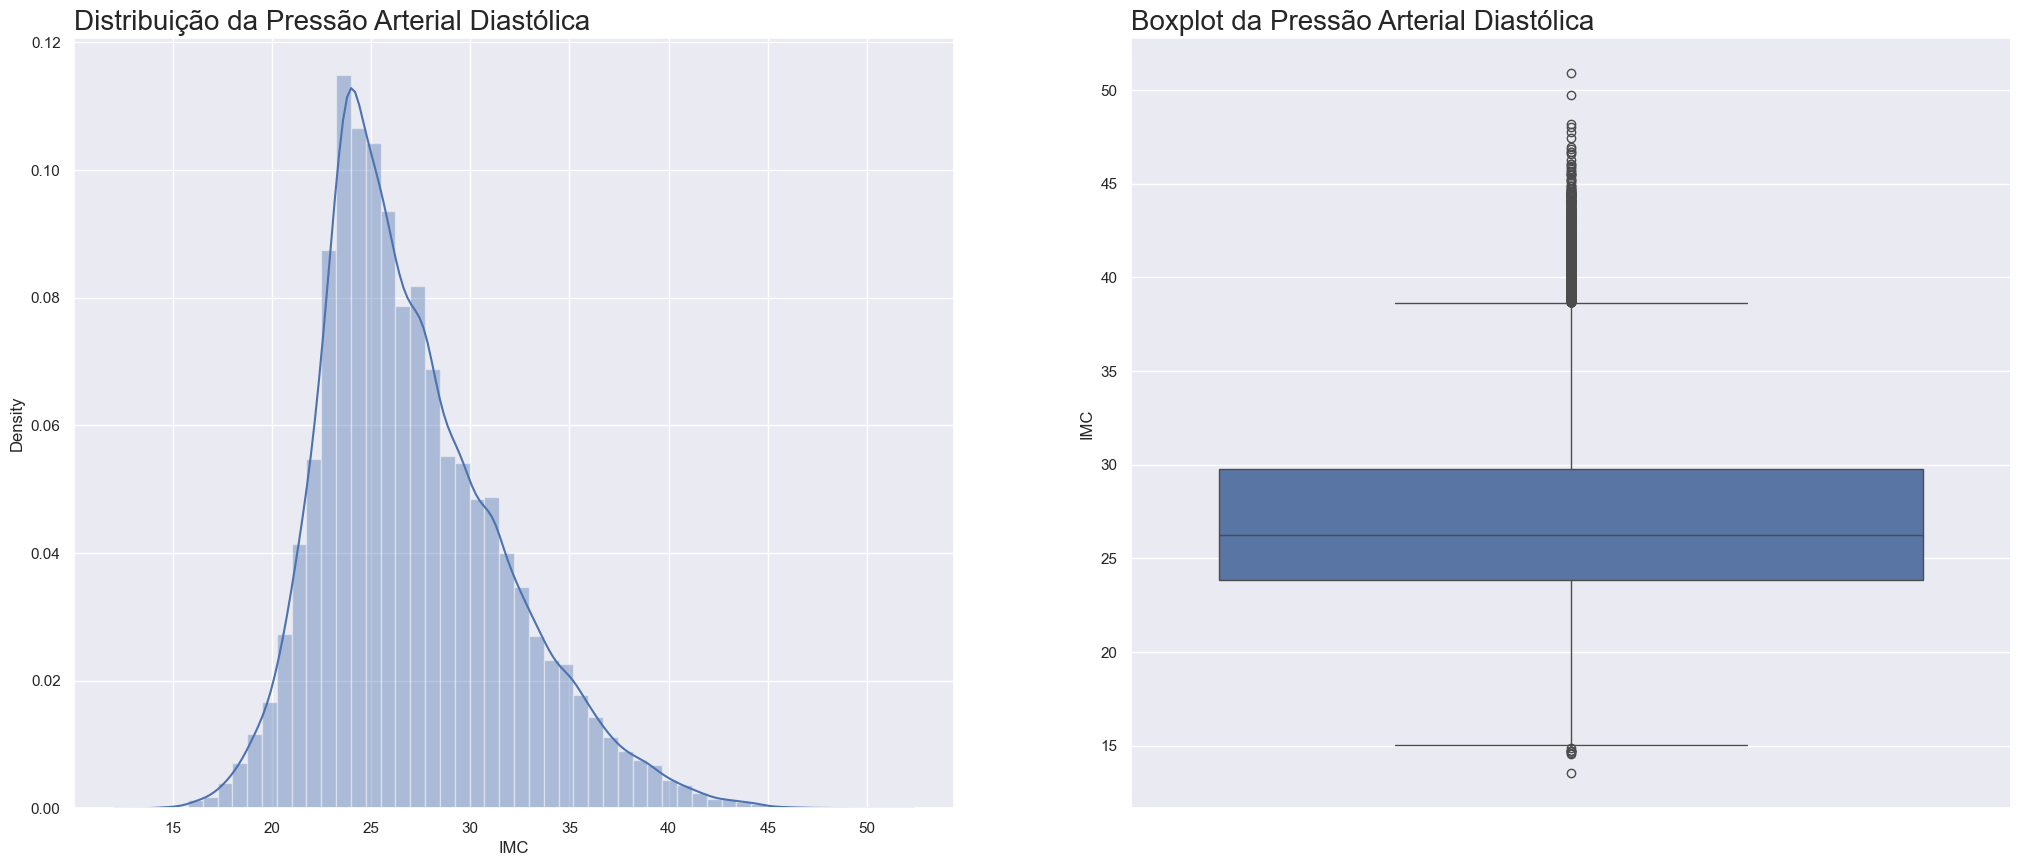

In [39]:
plt.subplot(1, 2, 1)
sns.distplot(df3["IMC"]);
plt.title("Distribuição da Pressão Arterial Diastólica", fontsize=20, loc="left");

plt.subplot(1, 2, 2)
sns.boxplot(df3["IMC"]);
plt.title("Boxplot da Pressão Arterial Diastólica", fontsize=20, loc="left");

<h4>&#8226; Valores que fogem da realidade(outliers) serão verificados melhor na análise bivariada e multivariada.</h4>

<h2>Análise Bivariada</h2>

<p>
    <strong>Hipótese:</strong> Pessoas mais velhas possui maior chance de ter doença cardiovascular<br>
    &emsp;  -> Verdadeiro
</p>

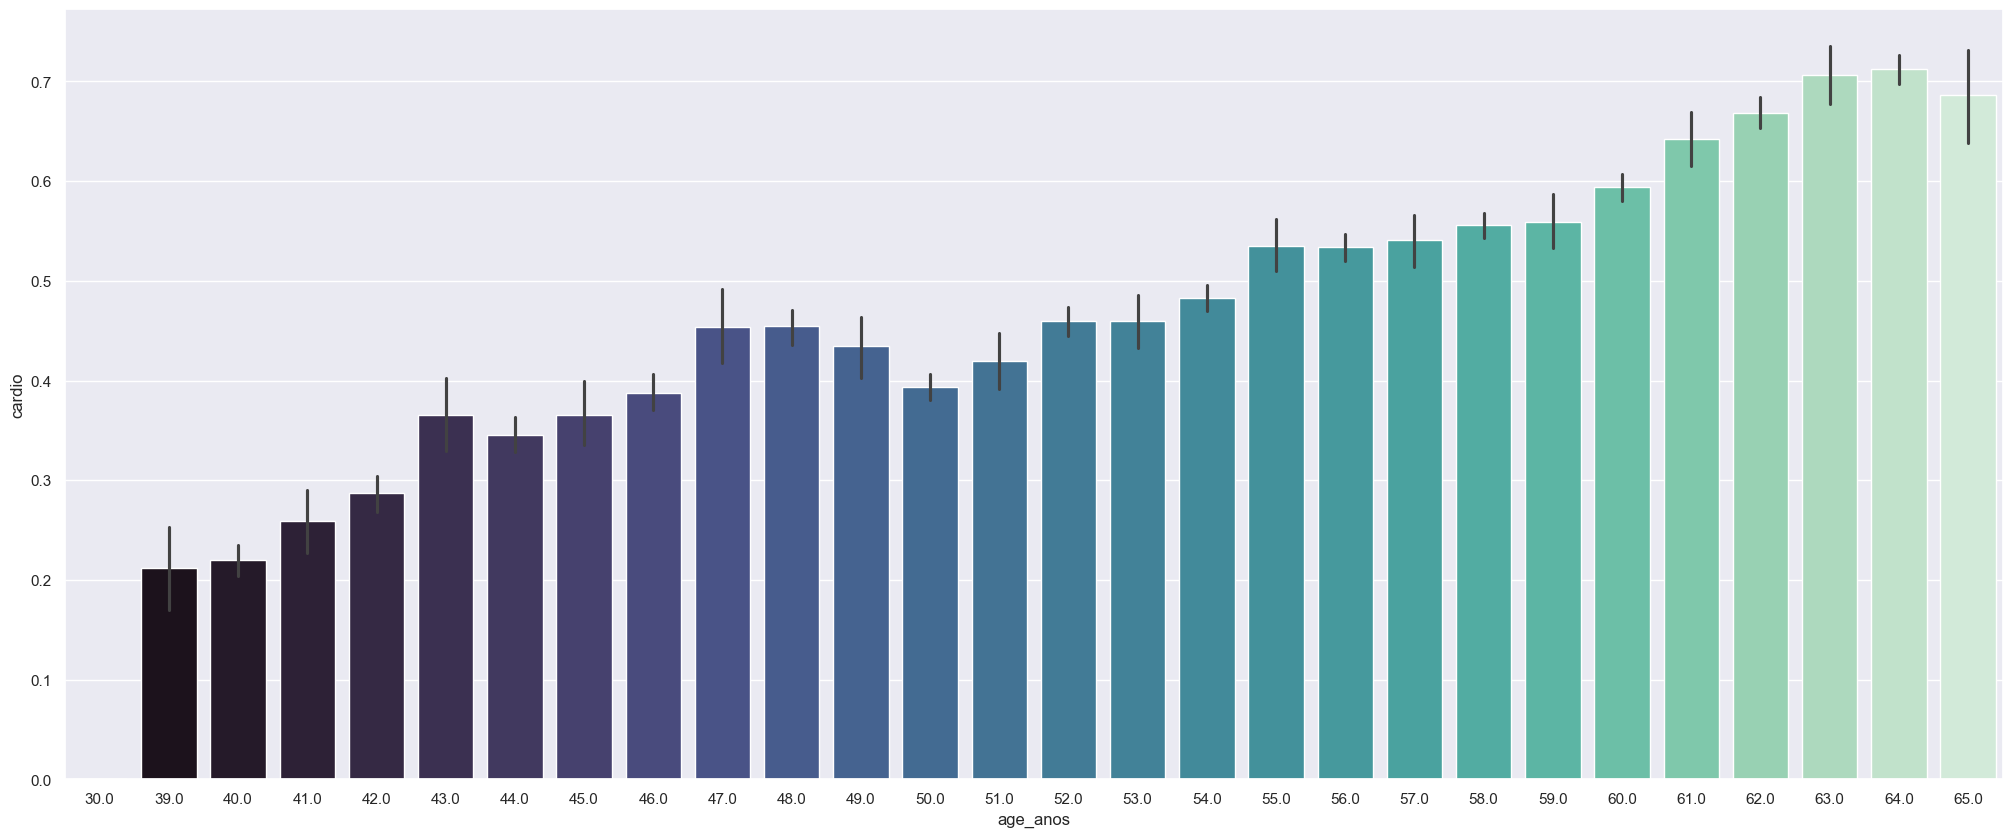

In [40]:
aux = df3[["age_anos", "cardio"]]

sns.barplot(x="age_anos", y="cardio", data=aux, palette="mako");

<p>
    <strong>Hipótese:</strong> Pessoas com peso mais alto possui maior chance de ter doença cardiovascular<br>
    &emsp; Verdadeiro. Acima de cerca de 75kg existem mais pessoas com doença cardiovascular que sem doença.
</p>

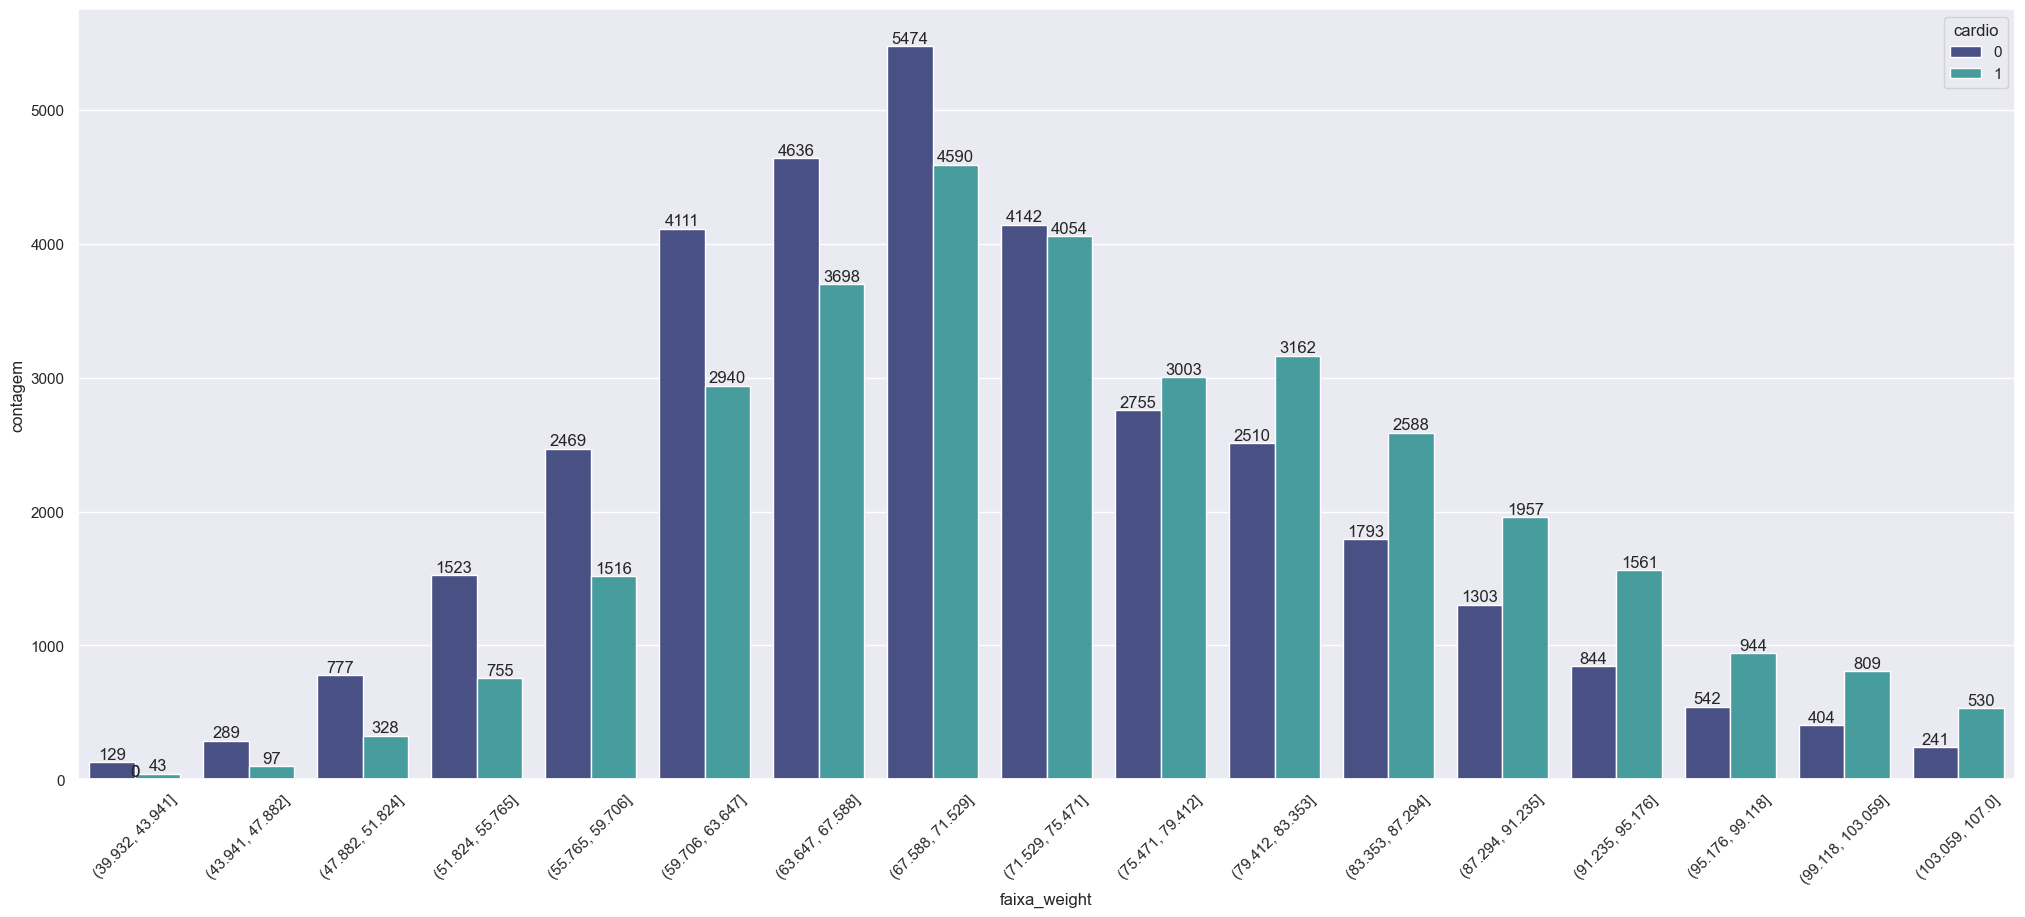

In [114]:
df3["faixa_weight"] = pd.cut(x = df3["weight"], bins = k, include_lowest = True)
aux = df3.groupby("faixa_weight").agg({"cardio":"value_counts"}).rename(columns={"cardio":"contagem"}).reset_index()
# aux = aux[aux["contagem"] != 0].reset_index(drop=True)


barplot = sns.barplot(x="faixa_weight", y="contagem", hue="cardio", data=aux, palette="mako");
plt.xticks(rotation=45);

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')


<p>
    <strong>Hipótese:</strong> Pessoas com pressão alta possui maior chance de ter doença cardiovascular<br>
    &emsp; 
</p>

,faixa_weight,cardio,contagem
0,"(10.81, 22.118]",0,0
1,"(10.81, 22.118]",1,0
2,"(22.118, 33.235]",1,0
3,"(22.118, 33.235]",0,0
4,"(33.235, 44.353]",0,174
5,"(33.235, 44.353]",1,58
6,"(44.353, 55.471]",0,2543
7,"(44.353, 55.471]",1,1165
8,"(55.471, 66.588]",0,10345
9,"(55.471, 66.588]",1,7426


In [ ]:
df3["ap_hi"].unique()